In [47]:
# Importo libreria para trabajar con dates 
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# OBJETIVO

### Desarrollar un modelo predictivo para la detección de riesgo de crédito, que permita evaluar la probabilidad de incumplimiento de los solicitantes de préstamos.

### CONTEXTO COMERCIAL
Como analista de riesgo en una institución financiera, busco optimizar la aprobación de préstamos para reducir la morosidad y maximizar los ingresos. Estoy evaluando un conjunto de datos de solicitantes de crédito para identificar patrones que nos permitan predecir con precisión el riesgo de incumplimiento y tomar decisiones informadas sobre la aprobación de nuevos préstamos.

### PROBLEMA COMERCIAL
Nuestra institución financiera enfrenta altos niveles de incumplimiento de préstamos, lo que afecta la rentabilidad y la estabilidad. Necesitamos identificar de manera precisa los solicitantes con mayor riesgo de impago para minimizar pérdidas y mejorar la gestión de riesgos. Analizar este conjunto de datos nos permitirá desarrollar un modelo predictivo que optimice la evaluación de crédito y reduzca el número de préstamos impagados.

### CONTEXTO ANALITICO
Contamos con un extenso conjunto de datos de solicitantes de préstamos, que incluye información detallada sobre ingresos, puntuaciones de crédito, historial de pagos y más. Utilizaremos técnicas de análisis exploratorio de datos y modelado predictivo para identificar patrones y factores que influyen en el incumplimiento de préstamos. Nuestro objetivo es construir un modelo que permita predecir con precisión el riesgo de impago, ayudando así a tomar decisiones más informadas y reducir la morosidad en nuestra cartera de préstamos.


In [48]:
# Levanto el data set desde mi repositori el GitHub y reviso lo importado
url = 'https://raw.githubusercontent.com/Jesujimenezv/Curso_Data_SCIENCE/main/Riskcore_dataset.xlsx'
df = pd.read_excel(url)


### PRIMERAS EXPLORACIONES

In [49]:
df.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3.329000e+03,0.724972,11,126928,0.199652,0.227590,4198059915607370,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3.309083e+16,0.935132,3,43609,0.207045,0.201077,7940542382198960,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3.393667e+16,0.872241,6,5205,0.217627,0.212548,6664066876774690,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5.757000e+03,0.896155,5,99452,0.300398,0.300911,10475069802292900,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8.605333e+15,0.941369,5,227019,0.197184,0.175990,33017914048482300,0.070210,1,36.0


In [50]:
# información general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ApplicationDate             20000 non-null  datetime64[ns]
 1   Age                         20000 non-null  int64         
 2   AnnualIncome                20000 non-null  int64         
 3   CreditScore                 20000 non-null  int64         
 4   EmploymentStatus            20000 non-null  object        
 5   EducationLevel              20000 non-null  object        
 6   Experience                  20000 non-null  int64         
 7   LoanAmount                  20000 non-null  int64         
 8   LoanDuration                20000 non-null  int64         
 9   MaritalStatus               20000 non-null  object        
 10  NumberOfDependents          20000 non-null  int64         
 11  HomeOwnershipStatus         20000 non-null  object    

In [51]:

# estadísticas básicas
df.describe()

,ApplicationDate,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,2.000000e+04,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,2.000000e+04,2.000000e+04,20000.000000,2.000000e+04
mean,2045-05-18 12:00:00,39.752600,59161.473550,571.612400,17.522750,24882.867800,54.057000,1.517300,454.292700,0.286381,...,1.105963e+16,0.799918,5.002650,7.229432e+04,0.239124,0.239110,1.135536e+16,6.095639e+14,0.239000,3.699920e+15
min,2018-01-01 00:00:00,18.000000,15000.000000,343.000000,0.000000,3674.000000,12.000000,0.000000,50.000000,0.000974,...,1.250000e+03,0.259203,0.000000,1.000000e+03,0.130101,0.113310,2.334650e+11,1.604321e-02,0.000000,2.880000e+01
25%,2031-09-09 18:00:00,32.000000,31679.000000,540.000000,9.000000,15575.000000,36.000000,0.000000,286.000000,0.160794,...,5.527125e+03,0.727379,3.000000,8.734750e+03,0.213889,0.209142,4.678136e+15,1.796931e-01,0.000000,4.900000e+01
50%,2045-05-18 12:00:00,40.000000,48566.000000,578.000000,17.000000,21914.500000,48.000000,1.000000,402.000000,0.266673,...,5.891625e+15,0.820962,5.000000,3.285550e+04,0.236157,0.235390,7.599993e+15,3.027115e-01,0.000000,5.300000e+01
75%,2059-01-25 06:00:00,48.000000,74391.000000,609.000000,25.000000,30835.000000,72.000000,2.000000,564.000000,0.390634,...,2.020667e+16,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1.296722e+16,5.092137e-01,0.000000,5.800000e+01
max,2072-10-03 00:00:00,80.000000,485341.000000,712.000000,61.000000,184732.000000,120.000000,5.000000,2919.000000,0.917380,...,4.095667e+16,0.999433,16.000000,2.603208e+06,0.405029,0.446787,5.697855e+16,3.734203e+16,1.000000,5.440000e+16
std,NaN,11.622713,40350.845168,50.997358,11.316836,13427.421217,24.664857,1.386325,240.507609,0.159793,...,1.242235e+16,0.120665,2.236804,1.179200e+05,0.035509,0.042205,1.139489e+16,2.893225e+15,0.426483,1.170299e+16


In [52]:
print(df.isnull().sum())

ApplicationDate               0
Age                           0
AnnualIncome                  0
CreditScore                   0
EmploymentStatus              0
EducationLevel                0
Experience                    0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
NetWorth                      0
BaseInterestRate              0
Interest

In [53]:
df.columns  # Muestra el nombre de todas las columnas

Index(['ApplicationDate', 'Age', 'AnnualIncome', 'CreditScore',
       'EmploymentStatus', 'EducationLevel', 'Experience', 'LoanAmount',
       'LoanDuration', 'MaritalStatus', 'NumberOfDependents',
       'HomeOwnershipStatus', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'LoanPurpose', 'PreviousLoanDefaults', 'PaymentHistory',
       'LengthOfCreditHistory', 'SavingsAccountBalance',
       'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities',
       'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth',
       'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment',
       'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore'],
      dtype='object')

In [54]:
# Diccionario de mapeo
nuevos_nombres = {
    'ApplicationDate': 'FechaSolicitud',
    'Age': 'Edad',
    'AnnualIncome': 'IngresosAnuales',
    'CreditScore': 'PuntuacionCredito',
    'EmploymentStatus': 'EstadoEmpleo',
    'EducationLevel': 'NivelEducacion',
    'Experience': 'Experiencia',
    'LoanAmount': 'MontoPrestamo',
    'LoanDuration': 'DuracionPrestamo',
    'MaritalStatus': 'EstadoCivil',
    'NumberOfDependents': 'NumeroDependientes',
    'HomeOwnershipStatus': 'EstadoPropiedad',
    'MonthlyDebtPayments': 'PagosDeudaMensuales',
    'CreditCardUtilizationRate': 'TasaUtilizacionTarjetaCredito',
    'NumberOfOpenCreditLines': 'NumeroLineasCreditoAbiertas',
    'NumberOfCreditInquiries': 'NumeroConsultasCredito',
    'DebtToIncomeRatio': 'RatioDeudaIngresos',
    'BankruptcyHistory': 'HistorialBancarrota',
    'LoanPurpose': 'PropósitoPrestamo',
    'PreviousLoanDefaults': 'IncumplimientosPrestamosPrevios',
    'PaymentHistory': 'HistorialPagos',
    'LengthOfCreditHistory': 'DuracionHistorialCredito',
    'SavingsAccountBalance': 'SaldoCuentaAhorros',
    'CheckingAccountBalance': 'SaldoCuentaCorriente',
    'TotalAssets': 'TotalActivos',
    'TotalDebtToIncomeRatio': 'RatioTotalDeudaIngresos',
    'LoanApproved': 'PrestamoAprobado',
    'RiskScore': 'PuntuacionRiesgo',
}

# Cambiar nombres de columnas
df.rename(columns=nuevos_nombres, inplace=True)

# Verificar cambios
df.head()

,FechaSolicitud,Edad,IngresosAnuales,PuntuacionCredito,EstadoEmpleo,NivelEducacion,Experiencia,MontoPrestamo,DuracionPrestamo,EstadoCivil,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,RatioTotalDeudaIngresos,PrestamoAprobado,PuntuacionRiesgo
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3.329000e+03,0.724972,11,126928,0.199652,0.227590,4198059915607370,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3.309083e+16,0.935132,3,43609,0.207045,0.201077,7940542382198960,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3.393667e+16,0.872241,6,5205,0.217627,0.212548,6664066876774690,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5.757000e+03,0.896155,5,99452,0.300398,0.300911,10475069802292900,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8.605333e+15,0.941369,5,227019,0.197184,0.175990,33017914048482300,0.070210,1,36.0


In [55]:
df.columns

Index(['FechaSolicitud', 'Edad', 'IngresosAnuales', 'PuntuacionCredito',
       'EstadoEmpleo', 'NivelEducacion', 'Experiencia', 'MontoPrestamo',
       'DuracionPrestamo', 'EstadoCivil', 'NumeroDependientes',
       'EstadoPropiedad', 'PagosDeudaMensuales',
       'TasaUtilizacionTarjetaCredito', 'NumeroLineasCreditoAbiertas',
       'NumeroConsultasCredito', 'RatioDeudaIngresos', 'HistorialBancarrota',
       'PropósitoPrestamo', 'IncumplimientosPrestamosPrevios',
       'HistorialPagos', 'DuracionHistorialCredito', 'SaldoCuentaAhorros',
       'SaldoCuentaCorriente', 'TotalActivos', 'TotalLiabilities',
       'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth',
       'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment',
       'RatioTotalDeudaIngresos', 'PrestamoAprobado', 'PuntuacionRiesgo'],
      dtype='object')

In [56]:
df['IncumplimientosPrestamosPrevios'].unique()

array([0, 1])

# EDA: Exploratory Data Analysis

Iniciaremos con el Análisis Exploratorio de Datos (EDA) para entender el dataset. Este paso es esencial para identificar patrones, detectar valores atípicos, y establecer relaciones entre las variables, lo que nos permitirá tener una mejor comprensión de los factores que influyen en la **aprobación de préstamos** y el **riesgo de incumplimiento**.

El análisis incluirá la visualización de distribuciones, análisis de correlaciones, y otras técnicas estadísticas que nos permitirán obtener insights valiosos para el análisis del riesgo de crédito.


### Gráficos Matplotlib

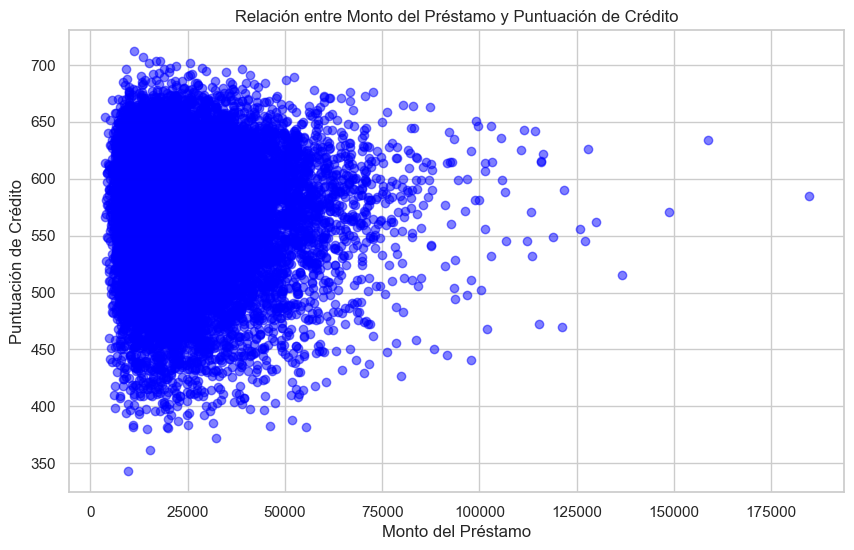

In [57]:
# Gráfico: Relación entre el monto del préstamo y la puntuación de crédito
plt.figure(figsize=(10, 6))
plt.scatter(df['MontoPrestamo'], df['PuntuacionCredito'], alpha=0.5, color='blue')
plt.title('Relación entre Monto del Préstamo y Puntuación de Crédito')
plt.xlabel('Monto del Préstamo')
plt.ylabel('Puntuación de Crédito')
plt.grid(True)
plt.show()


### Una observación de este gráfico muestra que los solicitantes con puntuaciones de crédito más bajas tienden a pedir montos de préstamo más pequeños. Esto podría deberse a que las instituciones financieras ofrecen menos crédito a personas con menor puntaje de crédito, lo que sugiere una posible relación entre el puntaje y el monto del préstamo aprobado.

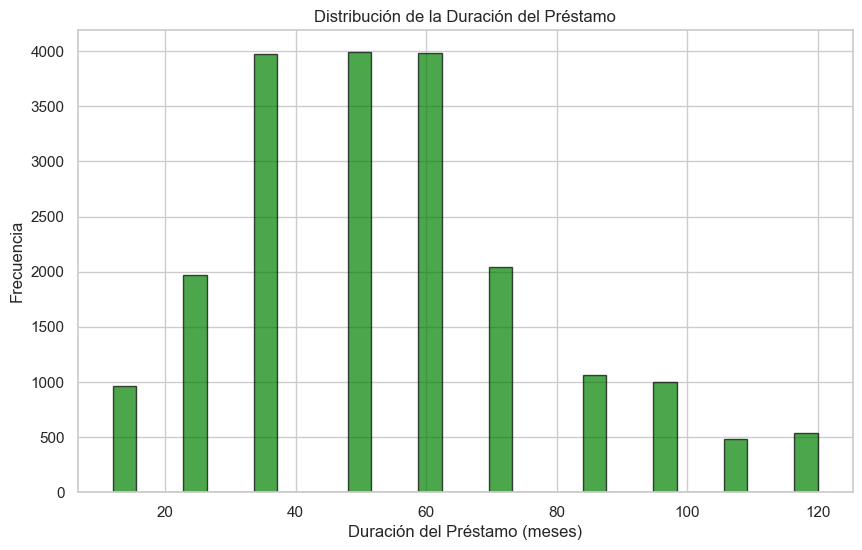

In [58]:
# Gráfico: Histograma de la duración del préstamo
plt.figure(figsize=(10, 6))
plt.hist(df['DuracionPrestamo'], bins=30, color='green', edgecolor='black', alpha=0.7)
plt.title('Distribución de la Duración del Préstamo')
plt.xlabel('Duración del Préstamo (meses)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


### La mayoría de los préstamos tienen una duración de entre 30 y 50 meses. Esto podría indicar que las personas tienden a preferir plazos más largos para pagar sus préstamos. Este dato es relevante para evaluar el riesgo, ya que los plazos más largos pueden aumentar la probabilidad de incumplimiento.

C:\Users\Msi\AppData\Local\Temp\ipykernel_24992\3731008670.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='EstadoCivil', y='IngresosAnuales', data=df, palette='Set3')


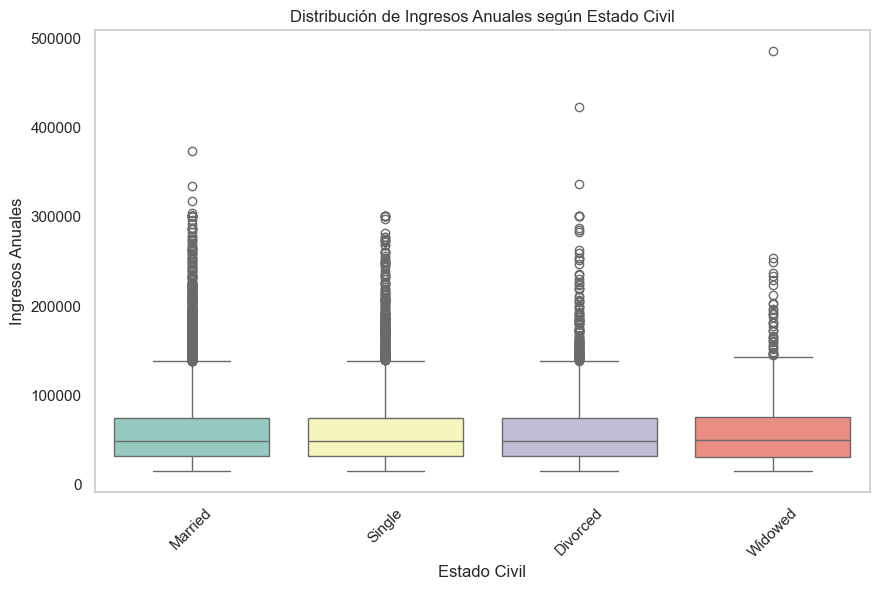

In [59]:
# Gráfico: Boxplot de los ingresos anuales según el estado civil
plt.figure(figsize=(10, 6))
sns.boxplot(x='EstadoCivil', y='IngresosAnuales', data=df, palette='Set3')
plt.title('Distribución de Ingresos Anuales según Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Ingresos Anuales')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.grid(axis='y')  # Solo mostrar la cuadrícula en el eje y
plt.show()


### El estado civil parece tener un impacto en los ingresos anuales. Las personas casadas o en pareja tienden a tener mayores ingresos, lo cual puede influir en su capacidad para obtener un préstamo y su estabilidad financiera.

### Gráficos Seaborn

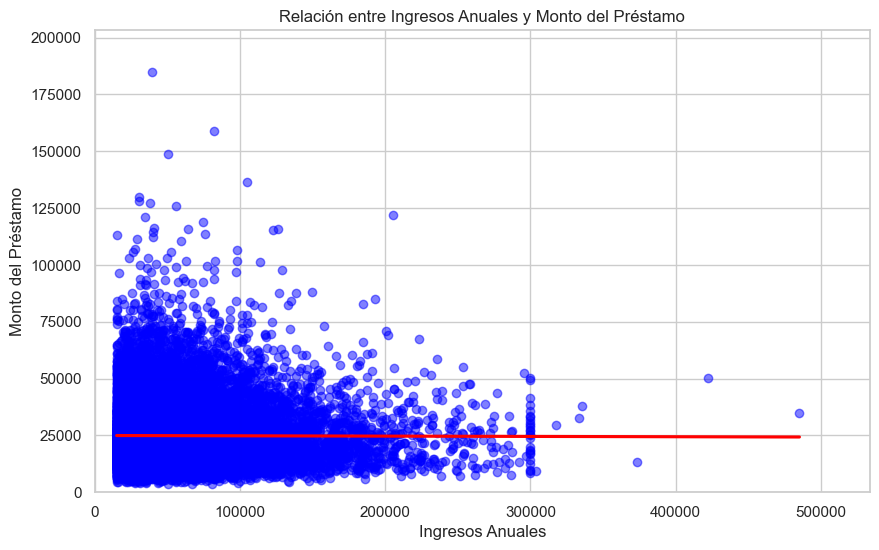

In [60]:
# Gráfico: Dispersión con ajuste de regresión entre Ingresos Anuales y Monto del Préstamo
plt.figure(figsize=(10, 6))
sns.regplot(x='IngresosAnuales', y='MontoPrestamo', data=df, scatter_kws={'alpha': 0.5, 'color': 'blue'}, 
            line_kws={'color': 'red'}, ci=None)  # Sin intervalo de confianza
plt.title('Relación entre Ingresos Anuales y Monto del Préstamo')
plt.xlabel('Ingresos Anuales')
plt.ylabel('Monto del Préstamo')
plt.xlim(0, df['IngresosAnuales'].max() * 1.1)  # Ajustar límites del eje x
plt.ylim(0, df['MontoPrestamo'].max() * 1.1)  # Ajustar límites del eje y
plt.grid(True)
plt.show()


### Este gráfico muestra la relación entre los ingresos anuales y el monto del préstamo, con una línea de regresión que indica una tendencia positiva. A medida que los ingresos aumentan, el monto del préstamo solicitado también tiende a aumentar.

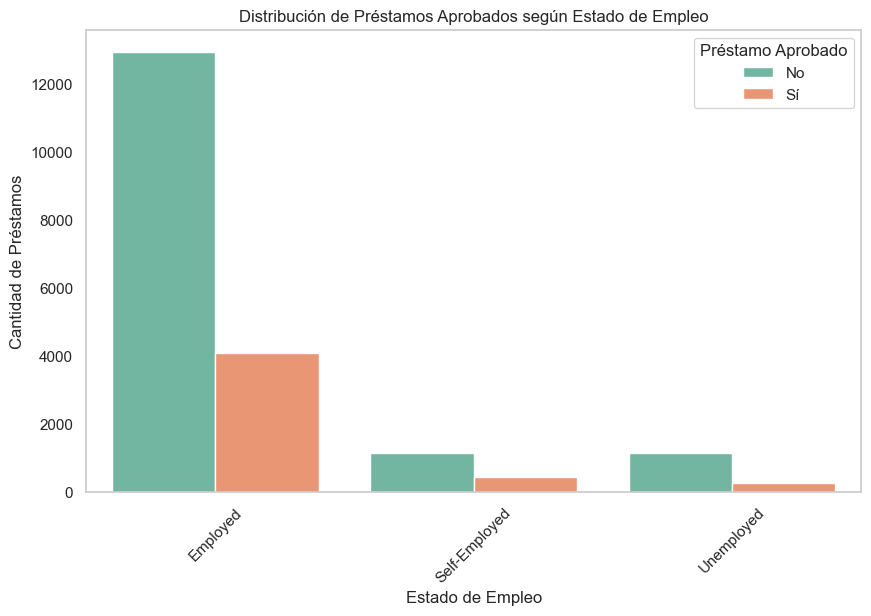

In [61]:
# Gráfico: Distribución de préstamos aprobados según el estado de empleo
plt.figure(figsize=(10, 6))
sns.countplot(x='EstadoEmpleo', hue='PrestamoAprobado', data=df, palette='Set2', dodge=True)
plt.title('Distribución de Préstamos Aprobados según Estado de Empleo')
plt.xlabel('Estado de Empleo')
plt.ylabel('Cantidad de Préstamos')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x
plt.grid(axis='y')  # Solo mostrar la cuadrícula en el eje y
plt.legend(title='Préstamo Aprobado', labels=['No', 'Sí'])
plt.show()



### Las personas que están empleadas tienen una mayor tasa de aprobación de préstamos, lo que no es sorprendente, ya que contar con empleo asegura una fuente estable de ingresos y, por lo tanto, menos riesgo para las instituciones financieras.



C:\Users\Msi\AppData\Local\Temp\ipykernel_24992\2595309979.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='NivelEducacion', y='PrestamoAprobado', data=df, ci=None, palette='pastel')
C:\Users\Msi\AppData\Local\Temp\ipykernel_24992\2595309979.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='NivelEducacion', y='PrestamoAprobado', data=df, ci=None, palette='pastel')


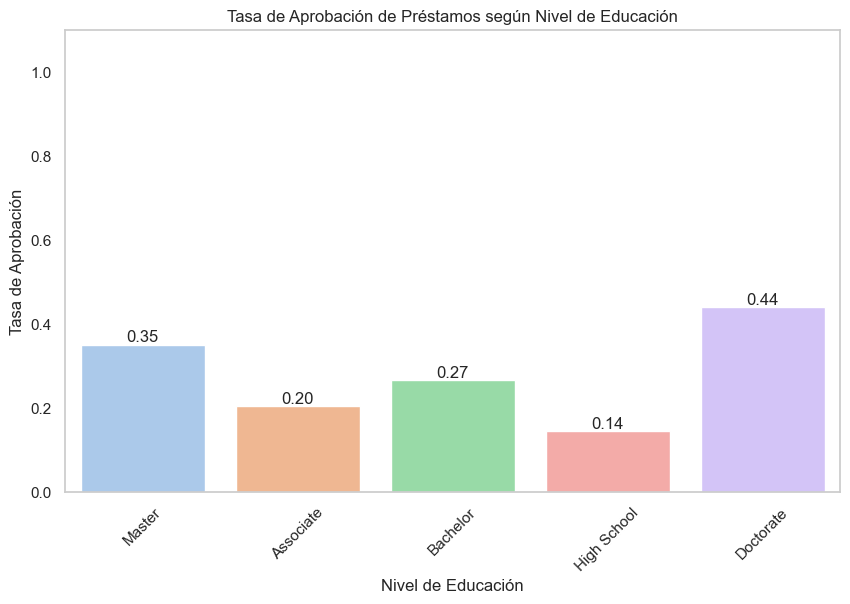

In [62]:
# Gráfico: Tasa de Aprobación de Préstamos según Nivel de Educación
plt.figure(figsize=(10, 6))
sns.barplot(x='NivelEducacion', y='PrestamoAprobado', data=df, ci=None, palette='pastel')
plt.title('Tasa de Aprobación de Préstamos según Nivel de Educación')
plt.xlabel('Nivel de Educación')
plt.ylabel('Tasa de Aprobación')

# Agregar los valores en cada barra
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom')

plt.xticks(rotation=45)
plt.ylim(0, df['PrestamoAprobado'].max() * 1.1)  # Ajustar límites del eje y
plt.grid(axis='y')  # Cuadrícula solo en el eje y
plt.show()



### Este gráfico muestra que los solicitantes con un nivel educativo más alto tienden a tener una mayor tasa de aprobación de préstamos. Esto sugiere que la educación puede ser un indicador importante de la estabilidad financiera y la capacidad de pago.